# Periodic features

Periodic features are those that repeat their values at regular intervals, like the hour, the days of a week, and the months of a year.

With cyclical or periodic features, values that are very different in absolute magnitude are actually close. For example, January is close to December, even though their absolute magnitude suggests otherwise.

We can use periodic functions like sine and cosine, to transform cyclical features and help machine learning models  pick up their intrinsic nature.

In [91]:
import numpy as np
import pandas as pd

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)
sns.set_palette('flare')
#sns.set_palette('Set2')
#sns.set_theme('notebook')

## Load the df

In [93]:
data = pd.read_csv('../../data/online_retail_II.csv')

In this dfset, we have the datetime variable in a column called **InvoiceDate**.

The dfset contains sales information for different customers in different countries. Customers may have made one or multiple purchases from the business that provided the df.

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [95]:
# This is how we parse date strings into datetime format:
data['date'] = pd.to_datetime(data['InvoiceDate'])
data.drop(columns='InvoiceDate')

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01 07:45:00
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09 12:50:00
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09 12:50:00
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09 12:50:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,2011-12-09 12:50:00


In [96]:
data['hour'] = data['date'].dt.hour

In [97]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,7
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 12:50:00,12


In [98]:
def create_periodic_feature(df, feature):
    # We transform the features with the sine and cosine function.
    df["hour_sin"] = np.sin(df[feature] / df[feature].max() * 2 * np.pi)
    df["hour_cos"] = np.cos(df[feature] / df[feature].max() * 2 * np.pi)

    df.head()

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

class PeriodicTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature, drop_origin=True):
        self.feature = feature
        self.drop_origin = drop_origin
        self.sin_name = None
        self.cos_name = None
        self.max_value = None

    def fit(self, X, y=None):
        # Generate the names for the new sin and cos features based on the original feature name
        self.sin_name = self.feature + '_sin'
        self.cos_name = self.feature + '_cos'
        
        # Find the maximum value of the feature to use for normalization in the transform step
        self.max_value = X[self.feature].max()
        return self

    def transform(self, X, y=None):
        # Create a copy of the input DataFrame to avoid modifying the original data
        X = X.copy()
        
        # Create the sin and cos transformations of the feature
        # The feature values are normalized by the max value and then multiplied by 2π to get the full circle
        X[self.sin_name] = np.sin(X[self.feature] / self.max_value * 2 * np.pi)
        X[self.cos_name] = np.cos(X[self.feature] / self.max_value * 2 * np.pi)
        
        # Drop the original feature as it's replaced by its sin and cos transformations
        if self.drop_origin: 
            X.drop(columns=self.feature, inplace=True)
        return X

In [100]:
pt = PeriodicTransformer('hour', False)
pt.fit(data)

PeriodicTransformer(drop_origin=False, feature='hour')

In [101]:
df = pt.transform(data)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,hour,hour_sin,hour_cos
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,7,0.866025,-0.500000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7,0.866025,-0.500000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,7,0.866025,-0.500000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,7,0.866025,-0.500000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,7,0.866025,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00,12,-0.433884,-0.900969
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,12,-0.433884,-0.900969
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00,12,-0.433884,-0.900969
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 12:50:00,12,-0.433884,-0.900969


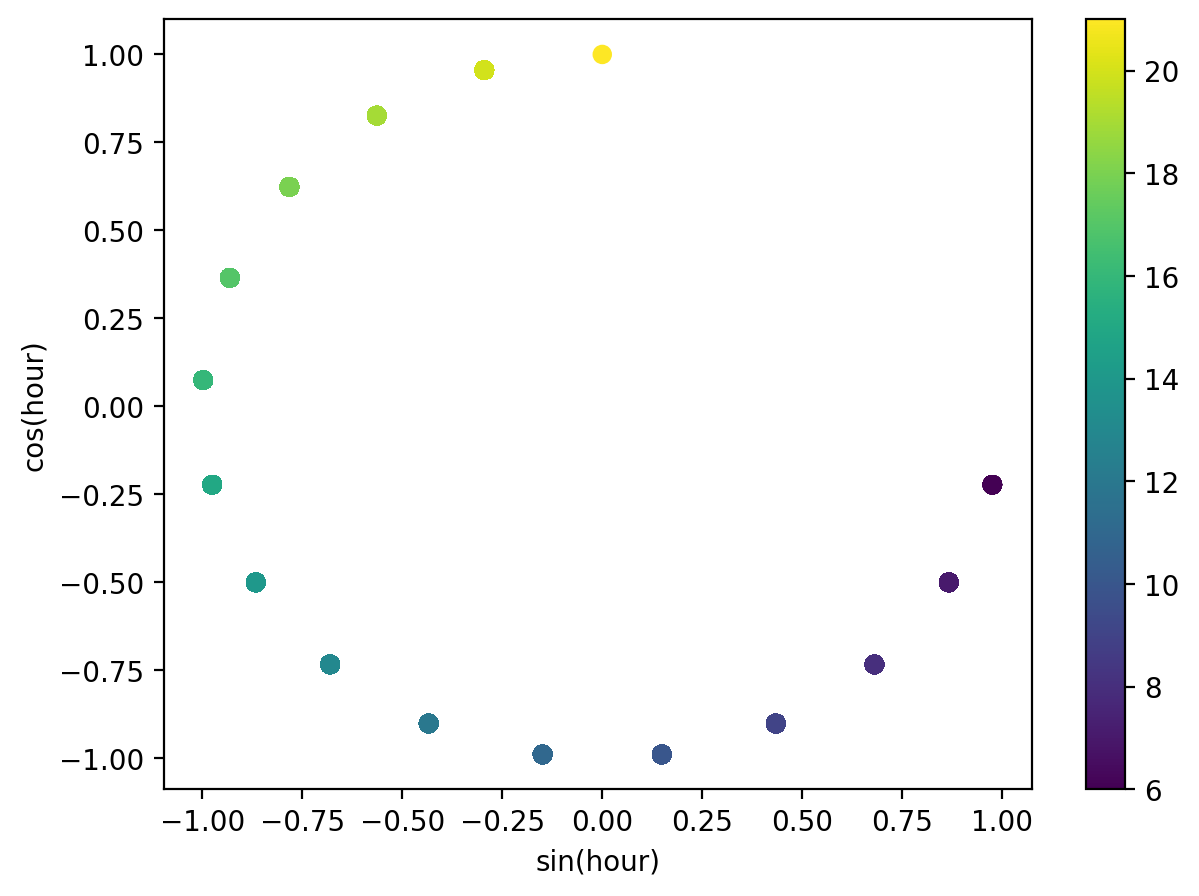

In [105]:
fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])
ax.set(
    xlabel="sin(hour)",
    ylabel="cos(hour)",
)
_ = fig.colorbar(sp)